# Introduction to Regression with Neural Networks in Tensorflow

There are many definitions for regression problems but in out case, we are going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number

In [1]:
# Import tensorflow
import tensorflow as tf

tf.__version__

2024-01-24 10:56:16.973396: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-24 10:56:19.273729: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-24 10:56:19.273892: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-24 10:56:19.581233: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-24 10:56:20.321609: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-24 10:56:20.323079: I tensorflow/core/platform/cpu_feature_guard.cc:1

'2.15.0'

### Creating some data to view and fit

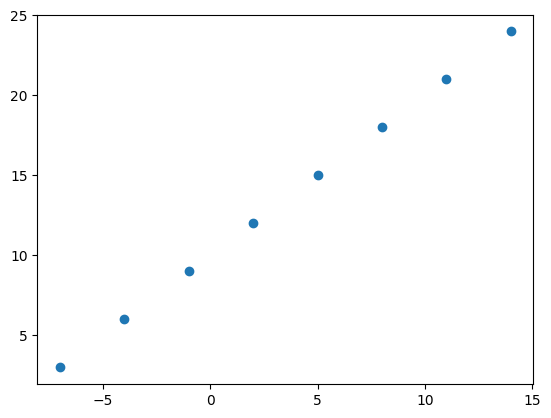

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualise it
plt.scatter(X,y)

In [7]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and output shapes

In [8]:
# Create a demo tensor for our housing price predection problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [10]:
X[0], y[0]

(-7.0, 3.0)

In [11]:
X[1], y[1]

(-4.0, 6.0)

In [12]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [15]:
X[0].ndim

0

In [4]:
# Turn our NumPy arrays into tensors with dtype tf.float32
X = tf.cast(tf.constant(X), tf.float32)
y = tf.cast(tf.constant(y), tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [17]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

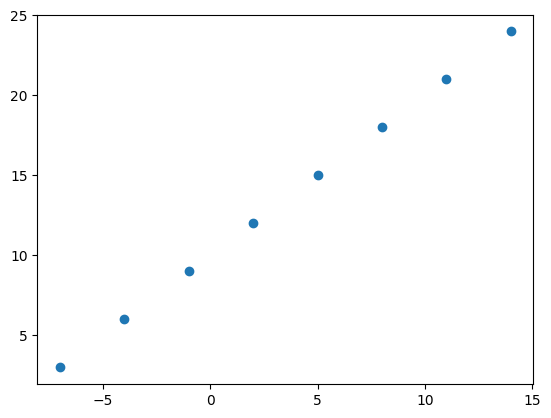

In [18]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow

1. **Creating a Model** - define input and output layers, as well as hidden layers in deep learning model.
2. **Compile a Model** - define loss function (in other words, the which tells  our model  how wrong it is) and the Optimizer (tell us how to improve patterns its learning) and Evaluation Matrix (what we can use to interpret performance of a model).
3. **Fitting a Model** - letting model try to find patterns between X and y (features and labels).

In [25]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequencial API
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))    # input one number and predict one number

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,                 # mea is Mean Absolute Error
              optimizer=tf.keras.optimizers.SGD(),      # SGD is Stochastic Gradient Descent
              metrics=["mae"]
              )

# Fit the model
model.fit(tf.expand_dims(X,axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 202ms/step - loss: 16.1011 - mae: 16.1011
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 15.8198 - mae: 15.8198
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 15.5386 - mae: 15.5386
Epoch 4/5
1/1 [==============================] - 0s 4ms/step - loss: 15.2573 - mae: 15.2573
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 14.9761 - mae: 14.9761


In [11]:
# Check X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [28]:
# Try and make prediction using  our model
y_pred = model.predict([17])
y_pred

1/1 [==============================] - 0s 40ms/step


array([[-6.351147]], dtype=float32)

In [29]:
y_pred + 14.9761    # Not a valid prediction

array([[8.624952]], dtype=float32)

### Improving our model

We can improve the model my alerting the steps we took to create a model

1. **Create a Model** - here we might add more layers, increase the number of hidden units (neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a Model** - here we might change the optimization function or perhaps the **learning rate** for said optimization function.
3. **Fit a Model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more example to learn from).

In [24]:
# Lets rebuild our model

# 1. Create the Model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# 2. Compile the Model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'],
              )

# 3. Fit the Model (this time we will train longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 193ms/step - loss: 11.4580 - mae: 11.4580
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 11.3255 - mae: 11.3255
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 11.1930 - mae: 11.1930
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 11.0605 - mae: 11.0605
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 10.9280 - mae: 10.9280
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 10.7955 - mae: 10.7955
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 10.6630 - mae: 10.6630
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 10.5305 - mae: 10.5305
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 10.3980 - mae: 10.3980
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 10.2655 - mae: 10.2655
Epoch 11/100
1/1 [==============================] - 0s 4m

1/1 [==============================] - 0s 7ms/step - loss: 7.2263 - mae: 7.2263
Epoch 40/100
1/1 [==============================] - 0s 8ms/step - loss: 7.2206 - mae: 7.2206
Epoch 41/100
1/1 [==============================] - 0s 15ms/step - loss: 7.2150 - mae: 7.2150
Epoch 42/100
1/1 [==============================] - 0s 9ms/step - loss: 7.2094 - mae: 7.2094
Epoch 43/100
1/1 [==============================] - 0s 9ms/step - loss: 7.2038 - mae: 7.2038
Epoch 44/100
1/1 [==============================] - 0s 5ms/step - loss: 7.1981 - mae: 7.1981
Epoch 45/100
1/1 [==============================] - 0s 5ms/step - loss: 7.1925 - mae: 7.1925
Epoch 46/100
1/1 [==============================] - 0s 5ms/step - loss: 7.1869 - mae: 7.1869
Epoch 47/100
1/1 [==============================] - 0s 5ms/step - loss: 7.1813 - mae: 7.1813
Epoch 48/100
1/1 [==============================] - 0s 5ms/step - loss: 7.1756 - mae: 7.1756
Epoch 49/100
1/1 [==============================] - 0s 5ms/step - loss: 7.1700 - m

In [25]:
# Remind ourself the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [26]:
# Try and make prediction using our model
y_pred_1 = model.predict([17])
y_pred_1

1/1 [==============================] - 0s 38ms/step


array([[29.788221]], dtype=float32)

In [49]:
# Lets rebuild our model again (adding hidden layers and changing optimizers)

# 1. Create the Model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, activation=None))
model.add(tf.keras.layers.Dense(1))

# 2. Compile the Model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'],
              )

# 3. Fit the Model (this time we will train longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100


1/1 [==============================] - 0s 365ms/step - loss: 13.3760 - mae: 13.3760
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 12.4555 - mae: 12.4555
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 11.5405 - mae: 11.5405
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 10.6249 - mae: 10.6249
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 9.7011 - mae: 9.7011
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 8.7597 - mae: 8.7597
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 7.7912 - mae: 7.7912
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 6.8477 - mae: 6.8477
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 6.9496 - mae: 6.9496
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 7.2872 - mae: 7.2872
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss: 7.5321 - 

In [51]:
# Try and make prediction using our model
model.predict([17])

1/1 [==============================] - 0s 23ms/step


array([[26.486822]], dtype=float32)

### Evaluating a Model

In practice, a typical workflow you go though in building neural networks is:

```
Build a Model -> Fit it -> Evaluate it -> Tweak a Model -> Fit it -> Evaluate it -> Tweak a Model -> Fit it -> Evaluate it...
```

When it comes to Evaluation... there are 3 things to memorize:

>"Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data we are working with? What does it look like?
* The model itself - what does a model look it?
* The trainig of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions line up against the ground truth (the original labels)? 

In [53]:
# Lets make a bigger model
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [56]:
# Make labels for the dataset
y = tf.math.add(X, 10)      # X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

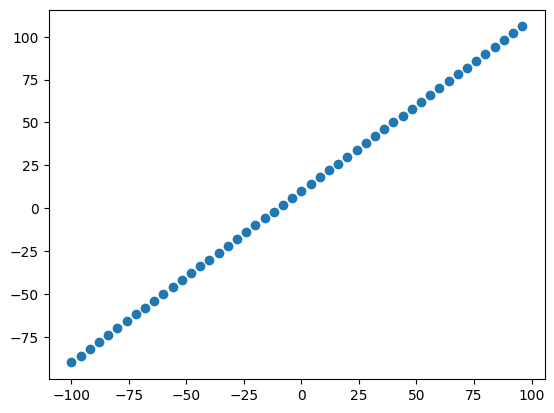

In [58]:
# Visualize the data
plt.scatter(X, y)

### The 3 sets...

* **Training set** - the models learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets trained on this data, which is 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what isthas learnt, this test is typically 10-15% of the data available.

In [60]:
# Check the lenght of how many samples we have
len(X)

50

In [64]:
# Get the train and test sizes
train_size = int(0.8 * len(X))      # 80 % of the data size
test_size = len(X) - train_size     # Remaing 20 % of the data size
train_size, test_size

(40, 10)

In [67]:
# Split the data to train and test set
X_train = X[:train_size]    # first 40 of training samples (80 % of the data)
y_train = y[:train_size]

X_test = X[train_size:]     # last 10 of training samples (20 % of the data)
y_test = y[train_size:]

X_train, X_test, y_train, y_test

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

### Visualising the data

Now we hav got our data in training and test sets... lets visualize it again!

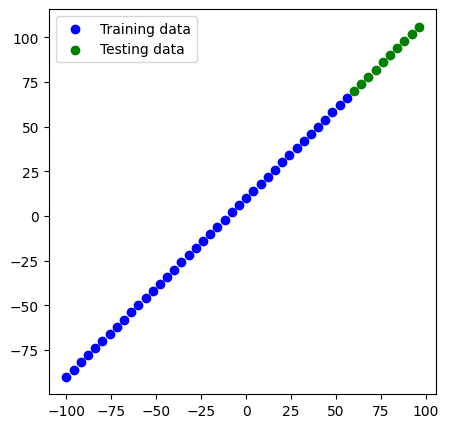

In [71]:
plt.figure(figsize=(5,5))

# Plot training data in blue
plt.scatter(X_train, y_train, color='b', label='Training data') # Our model will learn on this

# Plot test data in green
plt.scatter(X_test, y_test, color='g', label='Testing data')    # Wanted our model to predict this (when X, what's y?)

# Show a legend
plt.legend(loc='upper left')

In [80]:
# Let's have a look at how to build neural network for our data

# 1. Create a model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'],
              )
        
# 3. Fit the model
# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

### Visualizing the Model

In [76]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [78]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [88]:
# Let's create a model that builds automatically by defining the input_shape in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=[1]))

# 2. Compile the Model
model.compile(loss="mae", 
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [89]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* **Total params** - total number of parameters in the model
* **Trainable params** - these are the parameters (patterns) the model can update as it trains
* **Non-trainables params** - these parameters aren't updated while training (this is typically when you bring in already learnt parameters or patterns from other models during **transfer learning**)

In [90]:
# Let's fit the model to training data
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)